In [6]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# inpsect the traning curves
with open('./experiments/3_train_curve2.pkl', 'rb') as f:
    train_curves = pickle.load(f)

print(train_curves.keys())

dict_keys(['train', 'val'])


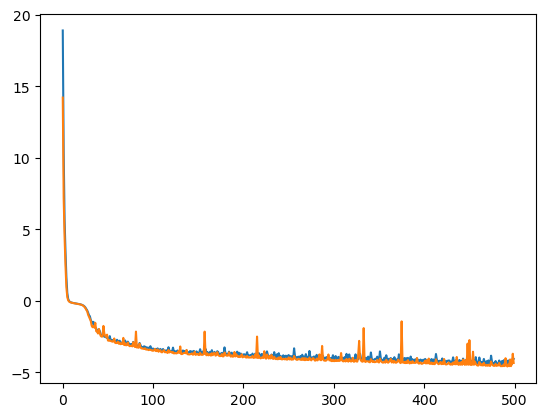

In [9]:
fig, ax = plt.subplots()
ax.plot(train_curves['train'])
ax.plot(train_curves['val'])
#ax.set_yscale('log')

(290, 5, 100, 100) (290, 10, 100, 100)
6.3706284e-06
dict_keys(['NumTrainableParams', 'Epoch', 'TrainLoss', 'ValLoss', 'ValACC', 'ValR2'])
[-2.6154304  0.8798231  0.9999483  0.9720378  0.9593279]


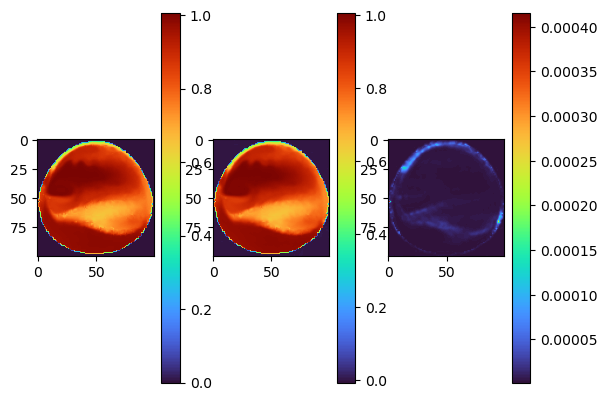

In [12]:
# visualize the predictions
data = np.load('./experiments/5_Pred2.npz')
true = data['true']
pred = data['pred']
print(true.shape, pred.shape)
print(np.mean((true-pred[:,:5,...])**2))

fig, ax = plt.subplots(1,3)
im=ax[0].imshow(true[0, 2, ...], cmap='turbo')
im2=ax[1].imshow(pred[0, 2, ...], cmap='turbo')
im3=ax[2].imshow(pred[0, 2+5, ...], cmap='turbo')

fig.colorbar(im)
fig.colorbar(im2)
fig.colorbar(im3)


with open('./experiments/ensemble0_log2.pkl', 'rb') as f:
    log = pickle.load(f)
print(log.keys())

print(log['ValR2'][-1])


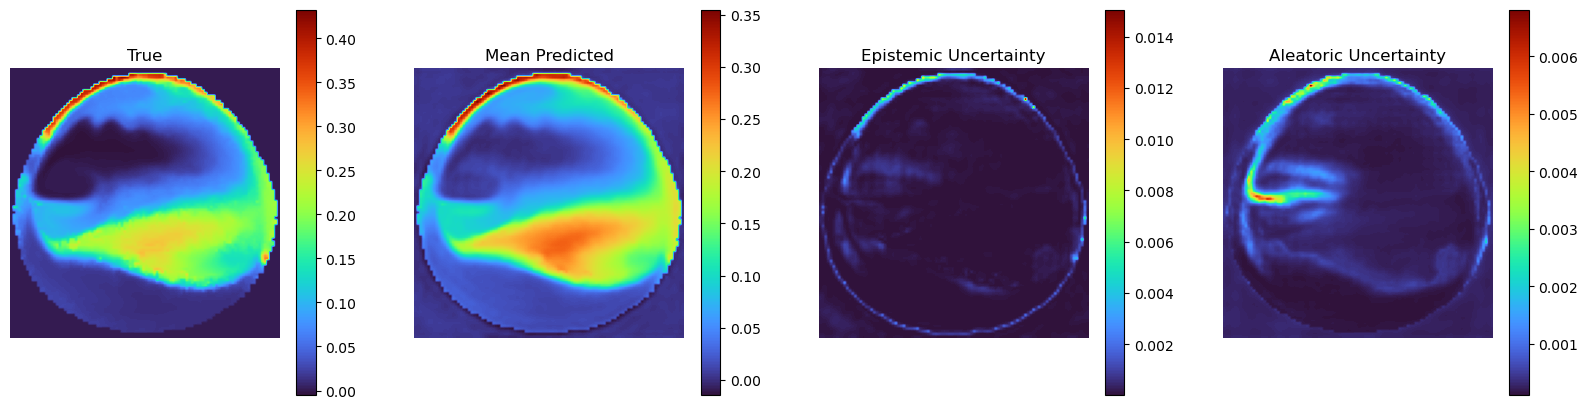

In [28]:
# load all the data



with open('../tmp/SOMA_mask.pkl', 'rb') as f:
        mask = pickle.load(f)
    
mask1 = mask['mask1']
mask2 = mask['mask2']
mask = np.logical_or(mask1, mask2)[0,0,:,:,0]

all_pred = []
all_pred_var = []
for i in range(0, 10):
    try:
        data = np.load(f'./experiments/{i}_Pred2.npz')
        true = data['true'][0, 1, ...]
        pred = data['pred'][0, 1, ...]
        pred_var = data['pred'][0, 1+5, ...]
        all_pred.append(pred)
        all_pred_var.append(pred_var)
    except:
        pass

pred_mean = np.mean(np.stack(all_pred), axis=0)
pred_var_ = np.std(np.stack(all_pred), axis=0)**2
al_uc = np.mean(np.stack(all_pred_var), axis=0)

# true[mask] = np.nan
# pred_mean[mask] = np.nan
# pred_var_[mask] = np.nan
# al_uc[mask] = np.nan


vmin = np.min([true, pred_mean, pred_var, al_uc]) 
vmax = np.max([true, pred_mean, pred_var, al_uc])
fig, ax = plt.subplots(1,4, figsize=(20,5))
im = ax[0].imshow(true, cmap='turbo', )
im2 = ax[1].imshow(pred_mean, cmap='turbo',)
im3 = ax[2].imshow(pred_var_, cmap='turbo')
im4 = ax[3].imshow(al_uc, cmap='turbo')

fig.colorbar(im)
fig.colorbar(im2)
fig.colorbar(im3)
fig.colorbar(im4)

ax[0].set_title("True")
ax[1].set_title("Mean Predicted")
ax[2].set_title("Epistemic Uncertainty")
ax[3].set_title("Aleatoric Uncertainty")

for a in ax:
    a.axis('off')
fig.savefig('./salinity_ensemble.png', dpi=500, format='png', bbox_inches='tight')
plt.show()

In [17]:
# investigate the data fed into the model
import h5py
f = h5py.File('/pscratch/sd/y/yixuans/datatset/de_dataset/soma_deep_ensemble_train.h5', 'r')
x = f['x']
x.shape


(2160, 100, 100, 5)

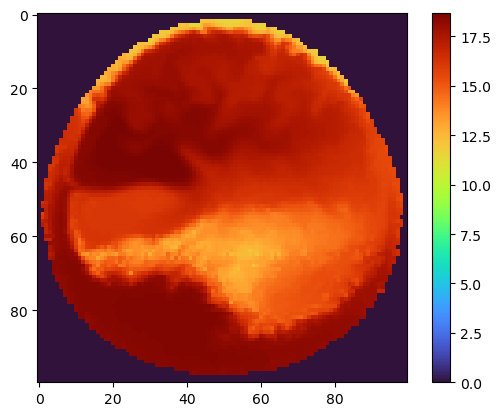

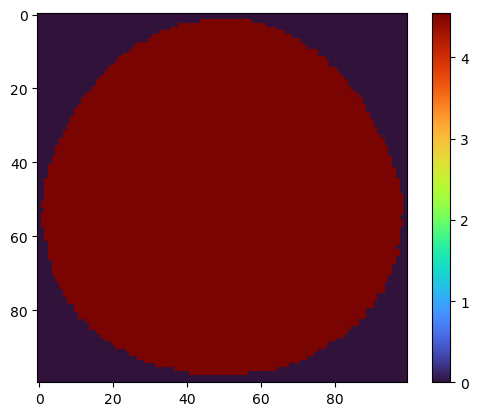

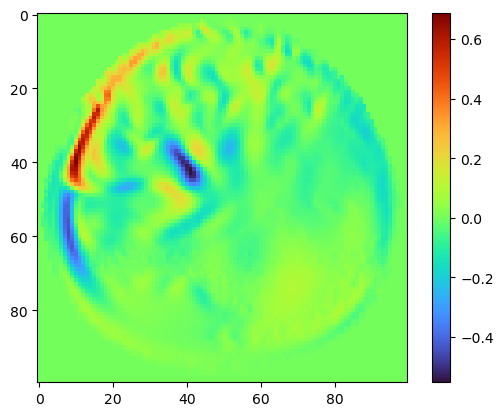

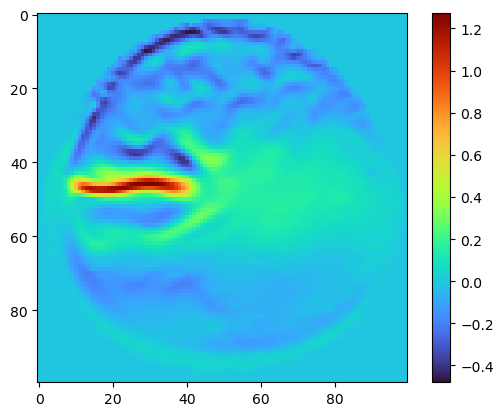

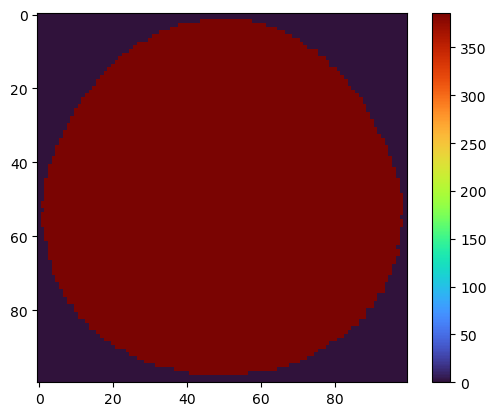

In [28]:
for i in range(x.shape[-1]):
    plt.imshow(x[123,...,i], cmap='turbo')
    plt.colorbar()
    plt.show()